In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = keras.datasets.fashion_mnist
mnist = input_data.read_data_sets("fashion_mnist",one_hot=True)

<IPython.core.display.Javascript object>

Extracting fashion_mnist/train-images-idx3-ubyte.gz
Extracting fashion_mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting fashion_mnist/t10k-images-idx3-ubyte.gz
Extracting fashion_mnist/t10k-labels-idx1-ubyte.gz


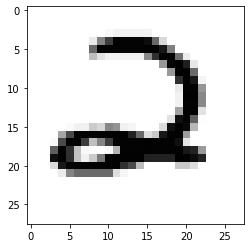

In [46]:
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='Greys')

In [19]:
def generator(z,reuse=None):
    with tf.variable_scope('gen',reuse=reuse):
        hidden1 = tf.layers.dense(inputs=z,units=128)
        # Leaky Relu
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1,hidden1)
        hidden2 = tf.layers.dense(inputs=hidden1,units=128)
        
        hidden2 = tf.maximum(alpha*hidden2,hidden2)
        output = tf.layers.dense(hidden2,units=784,activation=tf.nn.tanh)
        return output

In [20]:
def discriminator(X,reuse=None):
    with tf.variable_scope('dis',reuse=reuse):
        hidden1 = tf.layers.dense(inputs=X,units=128)
        # Leaky Relu
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1,hidden1)
        
        hidden2 = tf.layers.dense(inputs=hidden1,units=128)
        hidden2 = tf.maximum(alpha*hidden2,hidden2)
        
        logits = tf.layers.dense(hidden2,units=1)
        output = tf.sigmoid(logits)
    
        return output, logits

In [21]:
real_images = tf.placeholder(tf.float32,shape=[None,784])
z = tf.placeholder(tf.float32,shape=[None,100]) # noise or latent data

In [22]:
G = generator(z)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:
D_output_real , D_logits_real = discriminator(real_images)

In [24]:
D_output_fake, D_logits_fake = discriminator(G,reuse=True)

In [25]:
def loss_func(logits_in,labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in,labels=labels_in))

In [26]:
D_real_loss = loss_func(D_logits_real,tf.ones_like(D_logits_real)* (0.9))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [27]:
D_fake_loss = loss_func(D_logits_fake,tf.zeros_like(D_logits_real))

In [28]:
D_loss = D_real_loss + D_fake_loss

In [29]:
G_loss = loss_func(D_logits_fake,tf.ones_like(D_logits_fake))

In [30]:
learning_rate = 0.001

### optimizer

In [32]:
tvars = tf.trainable_variables()

d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

print([v.name for v in d_vars])
print([v.name for v in g_vars])

['dis/dense/kernel:0', 'dis/dense/bias:0', 'dis/dense_1/kernel:0', 'dis/dense_1/bias:0', 'dis/dense_2/kernel:0', 'dis/dense_2/bias:0']
['gen/dense/kernel:0', 'gen/dense/bias:0', 'gen/dense_1/kernel:0', 'gen/dense_1/bias:0', 'gen/dense_2/kernel:0', 'gen/dense_2/bias:0']


In [33]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss, var_list=d_vars)
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list=g_vars)

In [34]:
batch_size = 20
epochs = 100
init = tf.global_variables_initializer()
saver = tf.train.Saver(var_list=g_vars)

In [35]:
samples = []

with tf.Session() as sess:
    
    sess.run(init)
    
    # Recall an epoch is an entire run through the training data
    for e in range(epochs):
        # // indicates classic division
        num_batches = mnist.train.num_examples // batch_size
        
        for i in range(num_batches):
            
            # Grab batch of images
            batch = mnist.train.next_batch(batch_size)
            
            # Get images, reshape and rescale to pass to D
            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images*2 - 1
            
            # Z (random latent noise data for Generator)
            # -1 to 1 because of tanh activation
            batch_z = np.random.uniform(-1, 1, size=(batch_size, 100))
            
            # Run optimizers, no need to save outputs, we won't use them
            _ = sess.run(D_trainer, feed_dict={real_images: batch_images, z: batch_z})
            _ = sess.run(G_trainer, feed_dict={z: batch_z})
        
            
        print("Currently on Epoch {} of {} total...".format(e+1, epochs))
        
        # Sample from generator as we're training for viewing afterwards
        sample_z = np.random.uniform(-1, 1, size=(1, 100))
        gen_sample = sess.run(generator(z ,reuse=True),feed_dict={z: sample_z})
        
        samples.append(gen_sample)
        
#         saver.save(sess, './models/500_epoch_model.ckpt')


Currently on Epoch 1 of 100 total...
Currently on Epoch 2 of 100 total...
Currently on Epoch 3 of 100 total...
Currently on Epoch 4 of 100 total...
Currently on Epoch 5 of 100 total...
Currently on Epoch 6 of 100 total...
Currently on Epoch 7 of 100 total...
Currently on Epoch 8 of 100 total...
Currently on Epoch 9 of 100 total...
Currently on Epoch 10 of 100 total...
Currently on Epoch 11 of 100 total...
Currently on Epoch 12 of 100 total...
Currently on Epoch 13 of 100 total...
Currently on Epoch 14 of 100 total...
Currently on Epoch 15 of 100 total...
Currently on Epoch 16 of 100 total...
Currently on Epoch 17 of 100 total...
Currently on Epoch 18 of 100 total...
Currently on Epoch 19 of 100 total...
Currently on Epoch 20 of 100 total...
Currently on Epoch 21 of 100 total...
Currently on Epoch 22 of 100 total...
Currently on Epoch 23 of 100 total...
Currently on Epoch 24 of 100 total...
Currently on Epoch 25 of 100 total...
Currently on Epoch 26 of 100 total...
Currently on Epoch 27

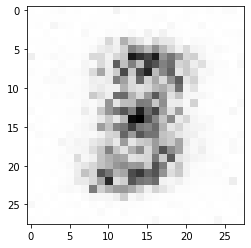

In [47]:
plt.imshow(samples[1].reshape(28,28),cmap='Greys')